# Proof of application on bi-dimensional data

This notebook has the goal to show the effectiveness of the implemented diversity algorithms.

The 3 algorithms are employed on a bi-dimensional set of data to select the k most diverse samples.

In [1]:
import sys
import math
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

# import diveristy module
sys.path.append('..')
import diversity

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

## Custom diversity functions - euclidean distance

In [3]:
def euclidean_distance(e1, e2):
    """
    Diversity function to compare an ELEMENT against another ELEMENT
    :param e1: element
    :param e2: element
    :return:   diversity value: the euclidean distance between the two elements
    """
    return np.sqrt((e1[0] - e2[0])**2 + (e1[1] - e2[1])**2)


def mean_of_euclidean_distances(e, sett):
    """
    Diversity function to compare an ELEMENT against a SET.
    :param element: element
    :param sett:    set of elements against which calculate diversity
    :return:        diversity value: the mean of the distances between the element and the elements of the set
    """
    if len(sett) == 0:
        raise Exception("Set into element-set diversity function is empty.")
    
    return sum([euclidean_distance(e, x) for x in sett]) / len(sett)

def sum_of_euclidean_distances_in_set(sett):
    """
    Diversity function to compute the diversity "amount" of a SET.
    :param sett: set for which calculate the diversity
    :return:     diversity value: the sum of all the distances of combination of elements
    """
    if len(sett) == 0:
        raise Exception("Set into set diversity function is empty.")

    diversity = 0
    for i in range(len(sett)):
        for j in range(i, len(sett)):
            diversity += euclidean_distance(sett[i], sett[j])

    return diversity

In [4]:
def get_data_to_plot(elements, selected):
    """
    Utility function to return data ready to be plot.
    """
    # convert to numpy array
    np_elements = np.array(elements)
    # pick the array of x and y coordinates
    x = np_elements[:,:1]
    y = np_elements[:,1:]

    # create an array to mark those selected
    z = np.zeros((N,1))
    for i, e in enumerate(elements):
        if e in selected:
            z[i][0] = 1.
    
    return x, y, z

## Generate the random data points

In [5]:
# number of elements
N = 50

# populate a set of random points
# the diversity module uses a list of elements (e.g. tuples) for generality of usage
elements = [(x[0], x[1]) for x in np.random.rand(N, 2)]

# Greedy algorithm demonstration

Selected values:
[(0.3425218133785164, 0.36296929014406587),
 (0.8479437532452793, 0.9366559489642852),
 (0.9729176386818931, 0.11094361161527644),
 (0.1579803754188095, 0.9200296460142288),
 (0.08916747216589815, 0.22994817798526768)]


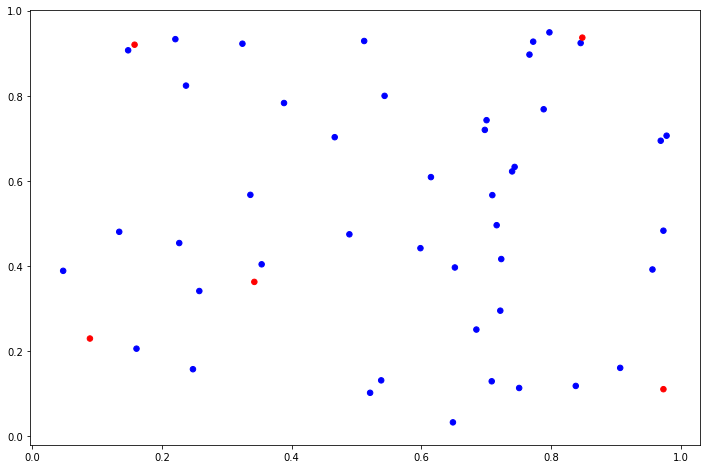

In [6]:
n_selected = 5

selected = diversity.greedy(elements, 
                            n_selected,
                            diversity_element_set=mean_of_euclidean_distances)
print("Selected values:")
pprint(selected)

x, y, z = get_data_to_plot(elements, selected)
        
# plot the scatterplot
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.scatter(x, y, s=30, c=z, marker="o",cmap="bwr")
plt.show()

# Interchange algorithm demonstration

Selected values:
[(0.9729176386818931, 0.11094361161527644),
 (0.8453612451927444, 0.9239321290431991),
 (0.08916747216589815, 0.22994817798526768),
 (0.14806287640984384, 0.9068719848640487),
 (0.6485338992704632, 0.033070970420587154)]


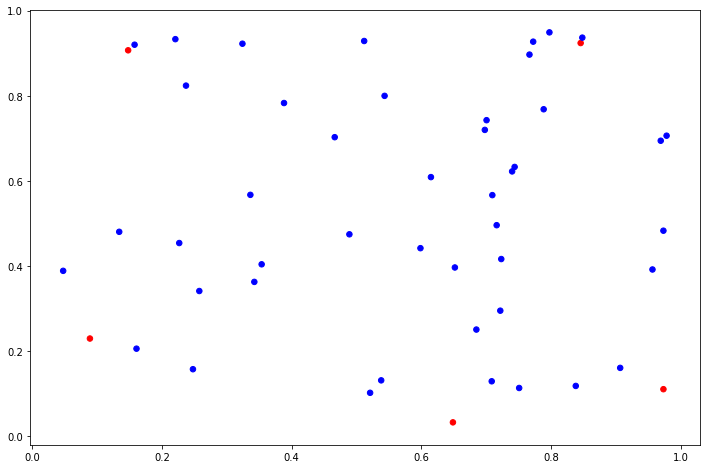

In [7]:
n_selected = 5

selected = diversity.interchange(elements, 
                                 n_selected,
                                 diversity_element_set=mean_of_euclidean_distances,
                                 diversity_set=sum_of_euclidean_distances_in_set)
print("Selected values:")
pprint(selected)

x, y, z = get_data_to_plot(elements, selected)
        
# plot the scatterplot
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.scatter(x, y, s=30, c=z, marker="o",cmap="bwr")
plt.show()

# Neighborhood algorithm demonstration

Selected values:
[(0.1579803754188095, 0.9200296460142288),
 (0.9729176386818931, 0.11094361161527644),
 (0.08916747216589815, 0.22994817798526768),
 (0.8479437532452793, 0.9366559489642852),
 (0.5209349339371455, 0.10248478519862214),
 (0.7159374101111635, 0.4961261620327925)]


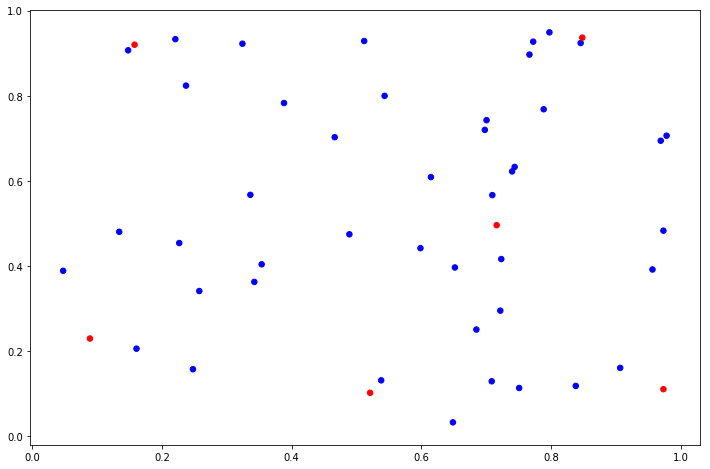

In [8]:
neighborhood_range = 0.4

selected = diversity.neighborhood(elements,
                                  ngb_range=neighborhood_range,
                                  diversity_element_element=euclidean_distance)
print("Selected values:")
pprint(selected)

x, y, z = get_data_to_plot(elements, selected)
        
# plot the scatterplot
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.scatter(x, y, s=30, c=z, marker="o",cmap="bwr")
plt.show()